<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Visualizacion_datos/blob/main/Pr_final_AnaAlonso_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install matplotlib

In [2]:
pip install plotly_express

In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [4]:
# Lectura de la base de datos
filename = 'Datos_practica_final_python.csv'
data = pd.read_csv(filename, sep = ',')


# Eliminar la columnas que no sirven para el ejercicio
data = data.drop(['UNIT'], axis=1)

Analizamos los datos para ver cuántos distintos hay y cuál es su distribución hay por campo.

In [ ]:
print(data['SCENARIO'].value_counts())
print('')
print(data['MU'].value_counts())
print('')
print(data['COUNTRY'].value_counts())
print('')
print(data['SECTOR'].value_counts())
print('')
print(data['FORECAST'].value_counts())
print('')
print(data['SUBBRAND'].value_counts())
print('')

AI_forecast    31704
actual          8968
Name: SCENARIO, dtype: int64

GBI FOBO        4548
India Bev       4526
Mexico          4182
Gulf Bev CU     4087
GC Bev          3928
Spain           3617
Pakistan Bev    3322
Chile           3158
North Asia      2754
ANZ Bev         2597
Colombia        2243
NE FOBO         1710
Name: MU, dtype: int64

Great Britain         4548
India                 4526
Mexico                4182
UnitedArabEmirates    4087
China                 3928
Spain                 3617
Pakistan              3322
Chile                 3158
South Korea           2754
Australia             2597
Colombia              2243
Sweden                1710
Name: COUNTRY, dtype: int64

AMESA     11935
Europe     9875
LATAM      9583
APAC       9279
Name: SECTOR, dtype: int64

AI_P07F    2628
AI_P08F    2628
AI_P12F    2628
AI_P05F    2628
AI_P11F    2628
AI_PF      2628
AI_P03F    2628
AI_P06F    2628
AI_P09F    2628
AI_P10F    2628
AI_P02F    2628
AI_P04F    2628
AI_AOP      168

Observamos que están bastante uniformemente distribuidos, en cada campo.

Procedo a eliminar aquellos registros con volúmenes negativos puesto que no tienen sentido.

In [5]:
# Cogemos solo los registros con volumen real positivo
data = data.drop(data[data['SCENARIO'] == 'actual'][data['AMOUNT'] < 0].index)

# Aquellos registros predichos cuyo valor del volumen es menor que 0, los convierto en 0.
data.loc[data['AMOUNT'] < 0, 'AMOUNT'] = 0

data['PERIOD'] = data['PERIOD'] - 1
# Revisión de los datos
print(data.shape)
data.head(10)

(40612, 12)


<ipython-input-5-b2bb4b52e458>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data.drop(data[data['SCENARIO'] == 'actual'][data['AMOUNT'] < 0].index)


,MU,BU,SECTOR,COUNTRY,SUBBRAND,YEAR,PERIOD,SCENARIO,AMOUNT,MONTH,FORECAST_YEAR,FORECAST
0,GC Bev,GC Bev,APAC,China,7up (L3),2023,3,AI_forecast,1.957937e+06,3,2022.0,AI_P07F
1,India Bev,India,AMESA,India,Pepsi Regular (L3),2023,8,AI_forecast,9.390326e+06,8,2022.0,AI_P07F
2,India Bev,India,AMESA,India,Pepsi Regular (L3),2022,8,AI_forecast,6.865113e+06,8,2022.0,AI_P08F
3,GC Bev,GC Bev,APAC,China,7up (L3),2024,2,AI_forecast,2.133347e+06,2,2022.0,AI_P12F
4,Mexico,LAB Mexico,LATAM,Mexico,7up Free (L3),2023,5,AI_forecast,3.493313e+06,5,2022.0,AI_P12F
5,ANZ Bev,ANZ,APAC,Australia,Diet Pepsi (L3),2023,2,AI_forecast,2.631914e+04,2,2022.0,AI_P05F
6,Spain,SWE,Europe,Spain,Aquarade By Radical (L3),2024,4,AI_forecast,9.268166e+02,4,2022.0,AI_P12F
7,GBI FOBO,FOBO BU,Europe,Great Britain,7up (L3),2023,4,AI_forecast,1.241093e+05,4,2022.0,AI_P11F
8,Mexico,LAB Mexico,LATAM,Mexico,Pepsi Max (L3),2023,1,AI_forecast,8.653957e+05,1,2022.0,AI_PF
9,NE FOBO,FOBO BU,Europe,Sweden,7up (L3),2022,7,AI_forecast,7.843683e+04,7,2022.0,AI_PF


# Pregunta 1
#### Clasifica cada uno de los campos en uno de los siguientes cuatro grupos: campos que indican información de la granularidad, campos que indican información temporal, campos que indican información acerca del propio valor del registro y campo que nos indique si el registro es un valor real o una predicción. Ordena la tabla para que los campos de cada grupo estén juntos.

-----------------------------
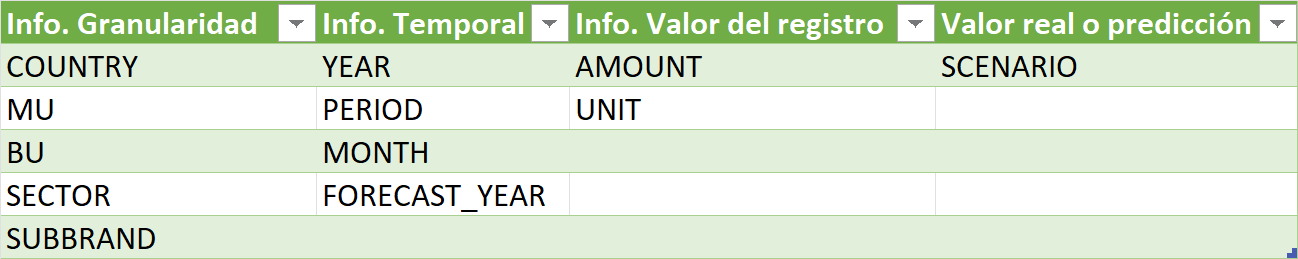

Dentro de la información del propio valor del registro he metido las unidades (UNITS), ya que aunque en este caso concreto no aporten información extra porque siempre tienen el valor 8OZ, es importante conocer qué unidades tiene el valor del registro para operar con dicho valor en caso de ser necesario.

Por ejemplo, no se pueden comparar registros de 1 kg con registros de 1 mg (en caso de estar hablado de pesos).

# Pregunta 2

#### Con relación a los valore reales (no predicciones). ¿Cuál es el volumen total de cada uno de los sectores, cual es el sector con más volumen y cuál es el país con más volumen dentro del sector con más volumen?

In [6]:
condition = data['SCENARIO'] == 'actual'
data_real = data[condition]


data_real_cust = data_real.groupby(['SECTOR'])['AMOUNT'].sum().reset_index()

# Observo los 4 diferentes clientes que hay
unique_values = data_real_cust['SECTOR'].unique()
unique_values

array(['AMESA', 'APAC', 'Europe', 'LATAM'], dtype=object)

Primero veremos cada sector por separado y posteriormente una gráfica de barras donde estén los 4 sectores para poder visualizar con claridad cuál de todos los sectores tiene más volumen.



In [7]:
for value in unique_values:
    sector_amount = data_real_cust[data_real_cust['SECTOR'] == value]
    sector_amount = sector_amount.sort_values(by='AMOUNT', ascending=False)[0:4]

    # Gráfica
    px.bar(sector_amount, x = 'AMOUNT', y = 'SECTOR', text_auto='.2s',
           title='Volumen sector: ' + str(value)).show()

In [9]:
# Sort the DataFrame by 'AMOUNT' in descending order
data_real_cust_sorted = data_real_cust.sort_values(by='AMOUNT', ascending=False)

# Plot a bar chart
fig = px.bar(data_real_cust_sorted, x='AMOUNT', y='SECTOR',
             text='AMOUNT', orientation='h',
             title='Total Amount by Sector')
fig.show()

if len(unique_values) <= 5:
  # Plot a pie chart
  fig = px.pie(data_real_cust_sorted, values='AMOUNT', names='SECTOR',
              title='Total Amount by Sector')
  fig.show()

Observamos que el sector con mayor volumen es el sector 'APAC', seguido de 'AMESA'. El resto de sectores tienen un volumen considerablemente inferior.

Como sabemos que el sector con más volumen es 'APAC', vamos a considerar solo los registros reales que pertenecen a este sector y agrupando por país, veremos cuál es el país con más volumen.

In [ ]:
data_real_APAC = data_real.loc[data_real['SECTOR'] == 'APAC']

data_real_APAC_cust = data_real_APAC.groupby(['COUNTRY'])['AMOUNT'].sum().reset_index()

In [ ]:
# Sort the DataFrame by 'AMOUNT' in descending order
data_real_cust_sorted = data_real_APAC_cust.sort_values(by='AMOUNT', ascending=False)

# Plot a bar chart
fig = px.bar(data_real_cust_sorted, x='AMOUNT', y='COUNTRY',
             text='AMOUNT', orientation='h',
             title='Total Amount by Country from Sector: APAC')
fig.show()

if len(data_real_APAC['COUNTRY'].value_counts()) <= 5:
  # Plot a pie chart
  fig = px.pie(data_real_cust_sorted, values='AMOUNT', names='COUNTRY',
              title='Total Amount by Country in Sector: APAC')
  fig.show()

Se va claramente que el país con más volumen dentro del Sector con más volumen (APAC) es China. Al contener solo 3 países distintos, visualizamos también un pie chart que nos muestra la diferencia porcentual, este devuelve que China tiene el 85% de la cantidad de volumen de todos los países (3) pertenecientes al sector 'APAC'.

# Pregunta 3
#### ¿Cuáles son las predicciones hechas para el país con más volumen del sector con más volumen (el país de la pregunta anterior) en los periodos 2 y 3 del año 2022? Atención: Hechas en los periodos 2 y 3 significa que se hicieron en ese momento del tiempo, pero al tener un horizonte de previsión de 18 periodos se habrán hecho para varios periodos futuros en ese momento. A simple vista, ¿Cuál de las previsiones te parece mejor, sabiendo ahora los datos reales que hubo posteriormente?

In [ ]:
data_2022 = data.loc[data['FORECAST_YEAR'] == 2022]
data_2_3_2022 = data_2022.loc[(data_2022['FORECAST'] == 'AI_P02F') | (data['FORECAST'] == 'AI_P03F')]

In [ ]:
data_2_3_2022_APAC = data_2_3_2022.loc[data_2_3_2022['SECTOR'] == 'APAC']

data_2_3_2022_APAC_cust = data_2_3_2022_APAC.groupby(['COUNTRY'])['AMOUNT'].sum().reset_index()

In [ ]:
# Sort the DataFrame by 'AMOUNT' in descending order
data_forecast_cust_sorted = data_2_3_2022_APAC_cust.sort_values(by='AMOUNT', ascending=False)

# Plot a bar chart
fig = px.bar(data_forecast_cust_sorted, x='AMOUNT', y='COUNTRY',
             text='AMOUNT', orientation='h',
             title='Total Amount by Country from Sector: APAC')
fig.show()

if len(data_2_3_2022_APAC['COUNTRY'].value_counts()) <= 5:
  # Plot a pie chart
  fig = px.pie(data_forecast_cust_sorted, values='AMOUNT', names='COUNTRY',
              title='Total Amount by Country in Sector: APAC')
  fig.show()

Aquí podemos ver cuales son los volúmenes de las predicciones hechas para los países del sector 'APAC'. Observamos con claridad que China es el país que más volumen tiene.

En el siguiente códgio podemos ver las 504 predicciones de China en el sector 'APAC' durante los períodos 2 y 3 del año 2022.

In [ ]:
data_2_3_2022_APAC_China = data_2_3_2022_APAC.loc[data_2_3_2022_APAC['COUNTRY'] == 'China']

Por otro lado, sacamos todos los valores reales posteriores a las predicciones para poder realizar las comparativas necesarias.

In [ ]:
data_real_APAC_China = data_real_APAC.loc[data_real_APAC['COUNTRY'] == 'China']
data_real_APAC_China_mas2022 = data_real_APAC_China.loc[data_real_APAC_China['YEAR'] >= 2022]

In [ ]:
# Supongamos que tienes dos DataFrames llamados data_real_APAC_China_mas2022 y data_2_3_2022_APAC_China
# Definir las columnas clave para la comparación
columna_no_clave = ['COUNTRY']

# Realizar la fusión basada en las columnas clave
data_merged = pd.merge(data_real_APAC_China_mas2022, data_2_3_2022_APAC_China, on=columna_no_clave, how='inner', suffixes=('_actual', '_forecast'))

# Filtrar las filas donde las condiciones se cumplen
condiciones = (data_merged['YEAR_actual'] == data_merged['YEAR_forecast']) & \
              (data_merged['PERIOD_actual'] == data_merged['PERIOD_forecast']) & \
              (data_merged['SUBBRAND_actual'] == data_merged['SUBBRAND_forecast'])

data_resultado = data_merged[condiciones]

columnas_clave = ['YEAR_actual', 'PERIOD_actual', 'SUBBRAND_actual', 'AMOUNT_actual', 'AMOUNT_forecast','FORECAST_forecast']
data_resultado = data_resultado[columnas_clave].reset_index()
data_resultado = data_resultado.sort_values(by=['YEAR_actual', 'PERIOD_actual'], ascending=[True, True])

# Creo un dataframe para el período 2 y otro para el período 3
data_resultado_2 = data_resultado.loc[data_resultado['FORECAST_forecast'] == 'AI_P02F']
data_resultado_3 = data_resultado.loc[data_resultado['FORECAST_forecast'] == 'AI_P03F']

data_resultado_2.head(20)

,index,YEAR_actual,PERIOD_actual,SUBBRAND_actual,AMOUNT_actual,AMOUNT_forecast,FORECAST_forecast
17,6083,2022,2,Diet Pepsi (L3),4.842167e+04,5.617984e+04,AI_P02F
28,11318,2022,2,7up (L3),2.355222e+06,2.600515e+06,AI_P02F
71,25990,2022,2,Pepsi Max (L3),3.600152e+06,2.929032e+06,AI_P02F
126,44380,2022,2,Mountain Dew (L3),1.059017e+04,7.967225e+03,AI_P02F
127,46389,2022,2,Pepsi Regular (L3),5.457063e+07,4.869477e+07,AI_P02F
184,70541,2022,2,Gatorade (L3),9.196739e+05,7.245101e+05,AI_P02F
236,90320,2022,2,Bubly (L3),3.319864e+05,7.836879e+05,AI_P02F
239,91836,2022,2,Aquafina (L3),2.531753e+06,2.816603e+06,AI_P02F
262,105090,2022,2,Other Csd (L3),1.615211e+03,7.546425e+03,AI_P02F
308,121916,2022,2,Tropicana (L3),7.936115e+05,7.458942e+05,AI_P02F


In [ ]:
data_resultado_2['Indice'] = range(len(data_resultado_2))
# Crear un gráfico de líneas con dos líneas
fig = px.line(data_resultado_2, x='Indice', y=['AMOUNT_actual', 'AMOUNT_forecast'],
              labels={'value': 'Volumen', 'Periodo': 'Periodo'},
              title='Predicciones Periodo 2 vs valor real')

# Mostrar el gráfico
fig.show()

data_resultado_3['Indice'] = range(len(data_resultado_3))
# Crear un gráfico de líneas con dos líneas
fig = px.line(data_resultado_3, x='Indice', y=['AMOUNT_actual', 'AMOUNT_forecast'],
              labels={'value': 'Volumen', 'Periodo': 'Periodo'},
              title='Predicciones Periodo 3 vs valor real')

# Mostrar el gráfico
fig.show()

<ipython-input-160-5369e4c5d968>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-160-5369e4c5d968>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A simple vista, parecen mejores las predicciones del periodo 3 que las del periodo 2. Es decir, predice mejor 'AI_P03F'.

A continuación, calculamos los errores absolutos de ambos periodos para confirmar cual de los dos ha predicho mejor.

Errores absolutos por periodo del periodo 2.

In [ ]:
errores_p2 = []
for i in range(1, 13):
  suma = 0
  suma2 = 0
  error = 0
  for j in range(0, (data_resultado_2.shape[0])):
    fila = data_resultado_2.iloc[j]
    if (fila['PERIOD_actual'] == i) & (fila['YEAR_actual'] == 2022):
      suma += fila['AMOUNT_actual']
      suma2 += fila['AMOUNT_forecast']
  error = abs(suma - suma2)
  errores_p2.append(error)

for i in range(1, 13):
  suma = 0
  suma2 = 0
  error = 0
  for j in range(0, (data_resultado_2.shape[0])):
    fila = data_resultado_2.iloc[j]
    if (fila['PERIOD_actual'] == i) & (fila['YEAR_actual'] == 2023):
      suma += fila['AMOUNT_actual']
      suma2 += fila['AMOUNT_forecast']
  error = abs(suma - suma2)
  errores_p2.append(error)

Errores absolutos por periodo del periodo 3.

In [ ]:
errores_p3 = []
for i in range(1, 13):
  suma = 0
  suma2 = 0
  error = 0
  for j in range(0, (data_resultado_3.shape[0])):
    fila = data_resultado_3.iloc[j]
    if (fila['PERIOD_actual'] == i) & (fila['YEAR_actual'] == 2022):
      suma += fila['AMOUNT_actual']
      suma2 += fila['AMOUNT_forecast']
  error = abs(suma - suma2)
  errores_p3.append(error)

for i in range(1, 13):
  suma = 0
  suma2 = 0
  error = 0
  for j in range(0, (data_resultado_3.shape[0])):
    fila = data_resultado_3.iloc[j]
    if (fila['PERIOD_actual'] == i) & (fila['YEAR_actual'] == 2023):
      suma += fila['AMOUNT_actual']
      suma2 += fila['AMOUNT_forecast']
  error = abs(suma - suma2)
  errores_p3.append(error)

In [ ]:
# Crear un array de números del 1 al 24 para las coordenadas x
n1 = [f'Pe {i+1} 2022' for i in range(12)]
n2 = [f'Pe {i+1} 2023' for i in range(12)]
coordenadas_x = np.concatenate((n1, n2))

# Crear un DataFrame con los datos y las coordenadas x
df2 = pd.DataFrame({'x': coordenadas_x, 'y': errores_p2})
df3 = pd.DataFrame({'x': coordenadas_x, 'y': errores_p3})

# Crear el gráfico de líneas con Plotly Express
fig = px.line(df2, x='x', y='y', markers=True, line_shape='linear', color_discrete_sequence=['blue'],
              labels={'y': 'Error_p2', 'x': 'Periodo2'})

# Agregar la segunda línea
fig.add_trace(px.line(df3, x='x', y='y', markers=True, line_shape='linear', color_discrete_sequence=['red'],
                      labels={'y': 'Error_p3', 'x': 'Periodo3'}).data[0])

fig.update_layout(title='Errores periodos 2 y 3',
                  xaxis_title='Periodos',
                  yaxis_title='Error absoluto',
                  legend_title='Leyenda',
                  legend=dict(
                      orientation='h',  # Orientación horizontal
                      yanchor='bottom',  # Anclaje inferior
                      y=1.02,  # Posición en la parte superior del gráfico
                      xanchor='right',  # Anclaje a la derecha
                      x=1  # Posición a la derecha del gráfico
                  ))

# Mostrar el gráfico
fig.show()

Otra forma de graficarlo. Los puntos corresponden a los errores por periodo del periodo 2, mientras que la línea corresponde a los errores absolutos por periodo del periodo 3.

In [ ]:
# Crear un array de números del 1 al 24 para las coordenadas x
n1 = [f'Pe {i+1} 2022' for i in range(12)]
n2 = [f'Pe {i+1} 2023' for i in range(12)]
coordenadas_x = np.concatenate((n1, n2))
# Crear un DataFrame con los datos y las coordenadas x
df2 = pd.DataFrame({'x': coordenadas_x, 'y': errores_p2, 'Periodo': ['Periodo 2'] * 24})
df2['color'] = 'blue'

df3 = pd.DataFrame({'x': coordenadas_x, 'y': errores_p3, 'Periodo': ['Periodo 3'] * 24})

df3['color'] = 'red'

# Crear el gráfico de líneas con Plotly Express
fig = px.line(df2, x='x', y='y', markers=True, line_shape='linear', color='x', line_dash='Periodo')

df3 = pd.DataFrame({'x': coordenadas_x, 'y': errores_p3, 'Periodo': ['Periodo 3'] * 24})

df3['color'] = 'red'
fig.add_trace(px.line(df3, x='x', y='y', markers=True, line_shape='linear', color='color', line_dash='Periodo').data[0])

fig.update_layout(title='Errores periodos 2 y 3',
                  xaxis_title='Periodos',
                  yaxis_title='Error absoluto')

# Mostrar el gráfico
fig.show()

Se ve con claridad que es mejor la predicción del periodo 2 que la 3. A continuación, se muestra una gráfica individual de cada uno de los periodos. Viendo el error absoluto por periodo.

In [ ]:
# Crear un array de números del 1 al 24 para las coordenadas x
n1 = [f'Pe {i+1} 2022' for i in range(12)]
n2 = [f'Pe {i+1} 2023' for i in range(12)]
coordenadas_x = np.concatenate((n1, n2))

# Crear un DataFrame con los datos y las coordenadas x
df = pd.DataFrame({'x': coordenadas_x, 'y': errores_p2})

# Crear el gráfico de líneas con Plotly Express
fig = px.line(df, x='x', y='y', markers=True, line_shape='linear')

# Personalizar el diseño del gráfico
fig.update_layout(title='Errores periodo 2',
                  xaxis_title='Periodos',
                  yaxis_title='Error absoluto')

# Mostrar el gráfico
fig.show()

# Crear un histograma con Plotly Express
fig = px.bar(df, x='y', title='Errores periodo 2',
                   labels={'y': 'Errores', 'x': 'Periodos'},
                   template='plotly_white',  # Puedes ajustar la plantilla según tus preferencias
                   width=800,  # Ajustar el ancho del gráfico
                   height=500,  # Ajustar la altura del gráfico
                   )

# Mostrar el histograma
fig.show()

In [ ]:
# Crear un array de números del 1 al 24 para las coordenadas x
n1 = [f'Pe {i+1} 2022' for i in range(12)]
n2 = [f'Pe {i+1} 2023' for i in range(12)]
coordenadas_x = np.concatenate((n1, n2))
# Crear un DataFrame con los datos y las coordenadas x
df = pd.DataFrame({'x': coordenadas_x, 'y': errores_p3})

# Crear el gráfico de líneas con Plotly Express
fig = px.line(df, x='x', y='y', markers=True, line_shape='linear')

# Personalizar el diseño del gráfico
fig.update_layout(title='Errores periodo 3',
                  xaxis_title='Periodos',
                  yaxis_title='Error absoluto')

# Mostrar el gráfico
fig.show()

# Crear un histograma con Plotly Express
fig = px.bar(df, x='y', title='Errores periodo 3',
                   labels={'y': 'Errores', 'x': 'Periodos'},
                   template='plotly_white',  # Puedes ajustar la plantilla según tus preferencias
                   width=800,  # Ajustar el ancho del gráfico
                   height=500,  # Ajustar la altura del gráfico
                   )

# Mostrar el histograma
fig.show()

Vamos a realizar un histograma para comparar cual de los dos periodos produce un error absoluto (frente a todos los periodos) mayor.

In [ ]:
df = pd.DataFrame({'Periodo2': [np.sum(errores_p2)], 'Periodo3': [np.sum(errores_p3)]})

# Apilar las columnas para facilitar la visualización en un diagrama de barras
df = df.melt(var_name='Columna', value_name='Valor')

# Crear un diagrama de barras con Plotly Express
fig = px.bar(df, x='Columna', y='Valor', title='Errores absolutos periodos 2 y 3',
             labels={'Valor': 'Valor', 'Columna': 'Columnas'},
             color='Columna',
             barmode='group',  # Asegurar que las barras estén agrupadas
             template='plotly_white',  # Puedes ajustar la plantilla según tus preferencias
             width=600,  # Ajustar el ancho del gráfico
             height=500,  # Ajustar la altura del gráfico
             )

# Mostrar el diagrama de barras
fig.show()

Se observa que el Periodo 2 tiene un error absoluto menor que el periodo 3.

Los errores absolutos cometidos en cada periodo son los siguientes.

In [ ]:
print('Error absoluto cometido periodo 2:', np.sum(errores_p2), '.')
print('Error absoluto cometido periodo 3:', np.sum(errores_p3), '.')

Error absoluto cometido periodo 2: 122797999.83423203 .
Error absoluto cometido periodo 3: 140354907.47401333 .


Es decir, que según el error absoluto cometido por periodo de estas dos predicciones, es mejor la predicción del periodo 2, aunque a simple vista, parecía mejor la del periodo 3.